In [1]:
import mvp
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
DB_PATH = '/home/naga/FintelligenceData/MetaTrader_M1.db'
petr3_raw = mvp.rawdata.RawData('PETR3',DB_PATH)
petr3_raw.df = petr3_raw.time_window(start = pd.Timestamp('2016-01-20 10:15:00'),stop = pd.Timestamp('2020-12-20 10:15:00'),time_step=60)

In [52]:
parameters = {'ModelParameters':{'DEV':[100],'MA':[100],'K_value':2}, 'OperationParameters':{'SL': 1.00, 'TP': 2.00, 'IH': 30}}
model = mvp.primary.PrimaryModel(petr3_raw,'bollinger_bands',parameters)

In [53]:
df = model.events_bollinger()

In [54]:
df.rename(columns={'state':'Trigger'},inplace=True)

In [55]:
labels = model.event_labels(df)

In [56]:
df['Labels'] = labels

In [57]:
df

,DateTime,Trigger,Labels
0,2016-02-22 14:00:00,-1.0,0.0
1,2016-03-02 13:00:00,-1.0,-1.0
2,2016-03-29 14:00:00,-1.0,1.0
3,2016-03-30 11:00:00,-1.0,1.0
4,2016-04-12 15:00:00,-1.0,0.0
...,...,...,...
224,2020-10-22 11:00:00,-1.0,1.0
225,2020-10-22 13:00:00,-1.0,1.0
226,2020-10-28 11:00:00,1.0,0.0
227,2020-11-09 11:00:00,-1.0,0.0


In [58]:
data = model.feature_data.df_curated

In [59]:
data['UpBand'] = data['MA_100'] + 2*data['DEV_100']
data['DownBand'] = data['MA_100'] - 2*data['DEV_100']

In [60]:
total = pd.concat([data,df.set_index('DateTime')],axis=1)

In [61]:
total.drop(columns=['Open','High','Low','Volume','TickVol','DEV_100'],inplace=True)

In [62]:
total

,Close,MA_100,UpBand,DownBand,Trigger,Labels
DateTime,,,,,,
2016-01-20 11:00:00,5.75,NaN,NaN,NaN,NaN,NaN
2016-01-20 12:00:00,5.74,NaN,NaN,NaN,NaN,NaN
2016-01-20 13:00:00,5.70,NaN,NaN,NaN,NaN,NaN
2016-01-20 14:00:00,5.60,NaN,NaN,NaN,NaN,NaN
2016-01-20 15:00:00,5.57,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2020-11-30 13:00:00,26.23,24.7242,27.306277,22.142123,NaN,NaN
2020-11-30 14:00:00,25.70,24.7518,27.315761,22.187839,NaN,NaN
2020-11-30 15:00:00,25.94,24.7812,27.331387,22.231013,NaN,NaN


In [63]:
buy_profit = total[(total['Trigger']==1) & (total['Labels']==1)][['Close']]
buy_loss = total[(total['Trigger']==1) & (total['Labels']==-1)][['Close']]

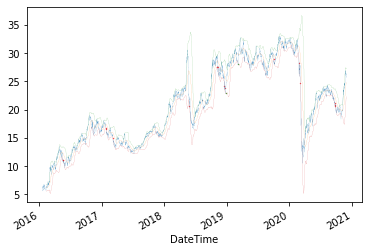

In [64]:
plt.scatter(buy_profit.index, buy_profit['Close'], c='g', s = 0.1)
plt.scatter(buy_loss.index, buy_loss['Close'], c='r', s = 0.1)
total.Close.plot(linewidth = 0.1)
total.MA_100.plot(linewidth = 0.1)
total.UpBand.plot(linewidth = 0.1)
total.DownBand.plot(linewidth = 0.1)
plt.savefig('test.pdf')

In [49]:
buy_loss.index

DatetimeIndex(['2016-05-20 14:00:00', '2016-05-20 16:00:00',
               '2017-01-27 11:00:00', '2017-01-27 13:00:00',
               '2017-03-08 13:00:00', '2018-05-28 11:00:00',
               '2018-11-08 16:00:00', '2018-11-09 11:00:00',
               '2018-12-19 11:00:00', '2018-12-20 11:00:00',
               '2019-10-02 11:00:00', '2020-02-26 14:00:00',
               '2020-03-06 11:00:00', '2020-09-22 12:00:00',
               '2020-09-24 11:00:00', '2020-09-25 11:00:00'],
              dtype='datetime64[ns]', name='DateTime', freq=None)

In [17]:
len(buy_profit.index)*model.operation_parameters['TP'] - len(buy_loss.index)*model.operation_parameters['SL']

2.0

In [19]:
plt.savefig('test.pdf')

<Figure size 432x288 with 0 Axes>